<a href="https://colab.research.google.com/github/teja-1403/PRODIGY_ML_04/blob/main/PRODIGY_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODIGY_04

# Classify different hand gestures from image

In [ ]:
# Import necessary libraries
import numpy as np
import os
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [ ]:
# Parameters
IMG_SIZE = 80  # Image size to resize to
data_path = '../input/leapgestrecog/leapGestRecog/'  # Path to dataset folder

In [ ]:
# Initialize lists to store images and labels
x_data = []
y_data = []

# Dictionaries for label encoding and decoding
lookup = {}
reverselookup = {}
label_count = 0

In [ ]:
# Create label mappings based on subfolders
for folder_name in os.listdir(data_path + '00/'):
    if not folder_name.startswith('.'):
        lookup[folder_name] = label_count
        reverselookup[label_count] = folder_name
        label_count += 1

In [ ]:
# Load images and labels
for i in range(10):  # Assumes folders named '00' to '09'
    folder_path = f'{data_path}0{i}/'
    for gesture_folder in os.listdir(folder_path):
        if not gesture_folder.startswith('.'):
            for image_file in os.listdir(f'{folder_path}{gesture_folder}/'):
                # Load and resize each image
                img_path = f'{folder_path}{gesture_folder}/{image_file}'
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                # Check if image is loaded successfully
                if img is None:
                    print(f"Warning: Image {img_path} could not be loaded.")
                    continue

                # Resize and add to dataset
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                x_data.append(img)
                y_data.append(lookup[gesture_folder])

In [ ]:
# Convert lists to numpy arrays and normalize
x_data = np.array(x_data, dtype='float32').reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y_data = np.array(y_data)

# One-hot encode labels for classification
y_data = to_categorical(y_data, num_classes=len(lookup))

# Shuffle the dataset
x_data, y_data = shuffle(x_data, y_data, random_state=42)

In [ ]:
# Split into training and validation sets (80% train, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [ ]:
# Display dataset info
print("Dataset loaded.")
print(f"Total images: {len(x_data)}")
print(f"Image shape: {x_data[0].shape}")
print(f"Number of classes: {len(lookup)}")

# Optional: Check label mappings
print("Label mappings:", lookup)

# Optional: Check the shapes of the train/validation split
print(f"Training set shape: {x_train.shape}, {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")

Dataset loaded.
Total images: 20000
Image shape: (80, 80, 1)
Number of classes: 10
Label mappings: {'02_l': 0, '04_fist_moved': 1, '09_c': 2, '10_down': 3, '06_index': 4, '08_palm_moved': 5, '07_ok': 6, '05_thumb': 7, '01_palm': 8, '03_fist': 9}
Training set shape: (16000, 80, 80, 1), (16000, 10)
Validation set shape: (4000, 80, 80, 1), (4000, 10)


In [ ]:
import random

def get_images_1_to_10(x_data, y_data):
    # Initialize empty lists to store selected images and labels
    selected_images = []
    selected_labels = []

    # Loop through labels 0 to 9
    for label in range(10):
        # Get indices where the label is equal to the current label
        label_indices = [i for i, lbl in enumerate(y_data) if np.argmax(lbl) == label]

        # Randomly select one image from the indices of that label
        selected_index = random.choice(label_indices)

        # Append the image and its label to the selected lists
        selected_images.append(x_data[selected_index])
        selected_labels.append(label)

    return np.array(selected_images), np.array(selected_labels)

# Select random 10 images of labeled 0 to 9
selected_x, selected_y = get_images_1_to_10(x_train, y_train)

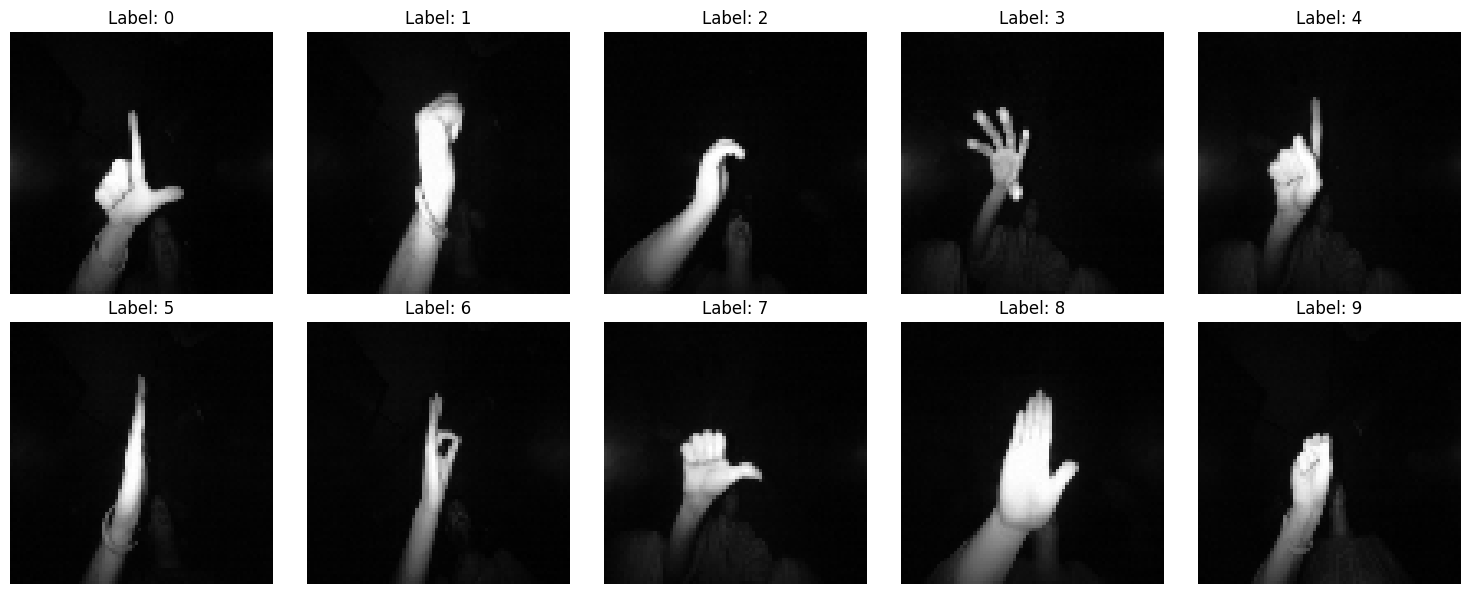

In [ ]:
# To visualize the selected images
import matplotlib.pyplot as plt

# Display the selected images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, img, label in zip(axes.ravel(), selected_x, selected_y):
    ax.imshow(img.reshape(image_shape[0], image_shape[1]), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the CNN model architecture
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last pooling layer
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization

model.add(Dense(len(lookup), activation='softmax'))  # Output layer with softmax activation

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 78, 78, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 39, 39, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,666 (4.36 MB)

 Trainable params: 1,142,666 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val),
    verbose=2
)

Epoch 1/10
250/250 - 9s - 38ms/step - accuracy: 0.8515 - loss: 0.4492 - val_accuracy: 0.9985 - val_loss: 0.0059
Epoch 2/10
250/250 - 3s - 11ms/step - accuracy: 0.9889 - loss: 0.0346 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 3/10
250/250 - 3s - 11ms/step - accuracy: 0.9912 - loss: 0.0262 - val_accuracy: 0.9998 - val_loss: 0.0021
Epoch 4/10
250/250 - 3s - 11ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9995 - val_loss: 0.0020
Epoch 5/10
250/250 - 3s - 11ms/step - accuracy: 0.9962 - loss: 0.0136 - val_accuracy: 0.9998 - val_loss: 0.0025
Epoch 6/10
250/250 - 3s - 11ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accuracy: 0.9998 - val_loss: 0.0023
Epoch 7/10
250/250 - 3s - 11ms/step - accuracy: 0.9960 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 7.5380e-05
Epoch 8/10
250/250 - 3s - 11ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9998 - val_loss: 0.0022
Epoch 9/10
250/250 - 3s - 11ms/step - accuracy: 0.9980 - loss: 0.0058 - val_accuracy: 0.9998 - val_l

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=2)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

125/125 - 0s - 3ms/step - accuracy: 0.9995 - loss: 0.0032
Validation Accuracy: 99.95%


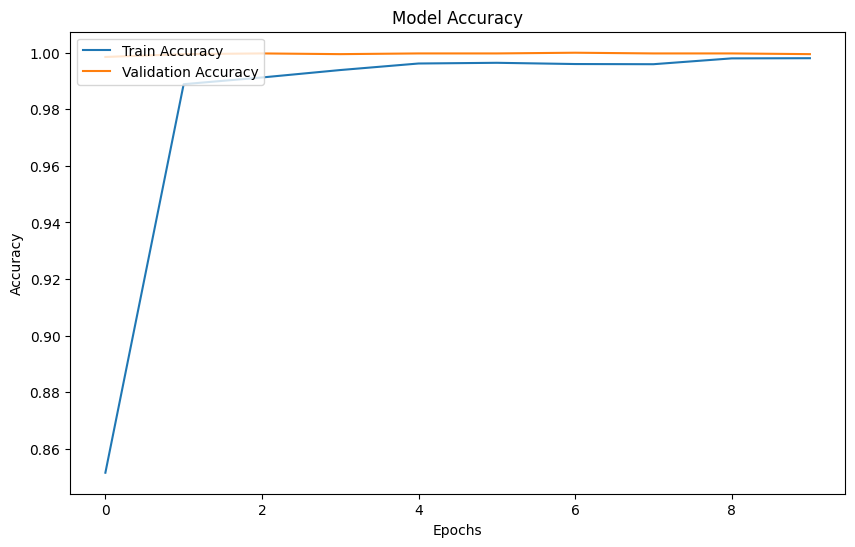

In [ ]:
# Plot the training & validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

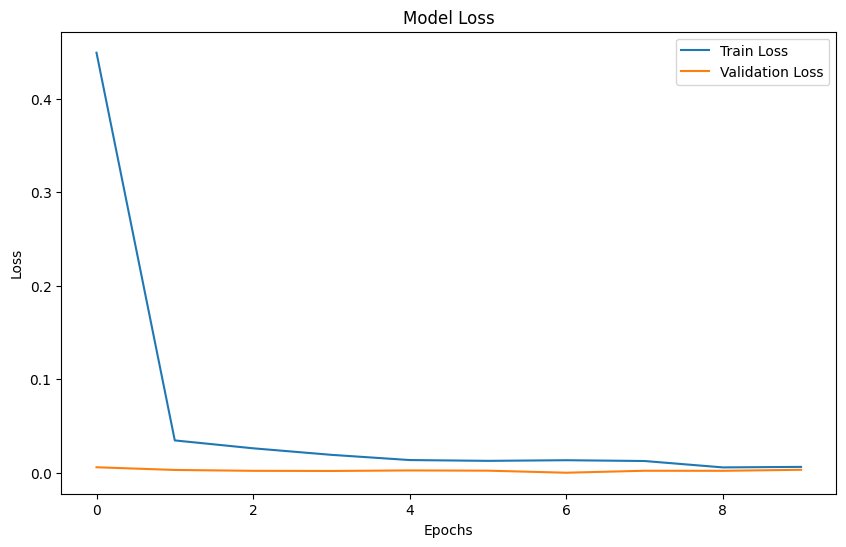

In [ ]:
# Plot the training & validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [ ]:
# Save the final model to a file
model.save('final_hand_gesture_cnn_model.h5')
print("Model saved as 'final_hand_gesture_cnn_model.h5'.")

Model saved as 'final_hand_gesture_cnn_model.h5'.


In [ ]:
# Load the saved model (optional)
loaded_model = load_model('final_hand_gesture_cnn_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


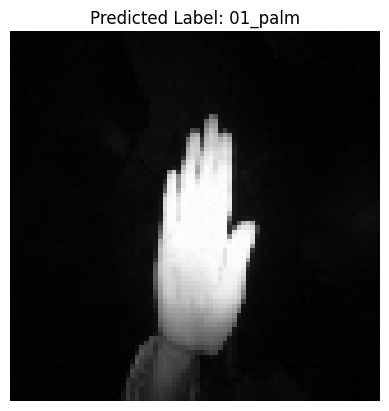

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


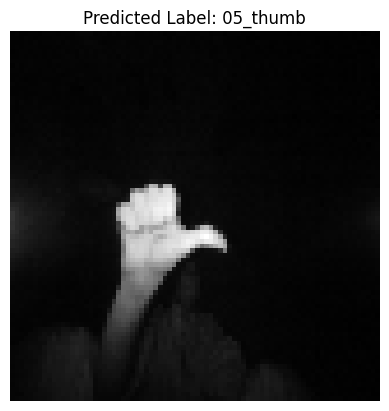

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


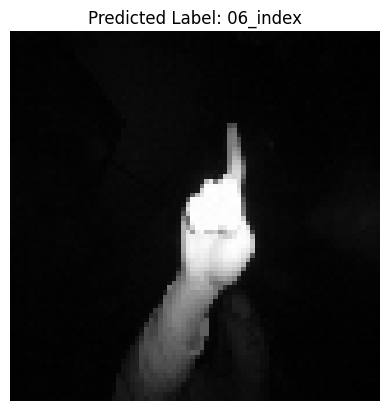

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


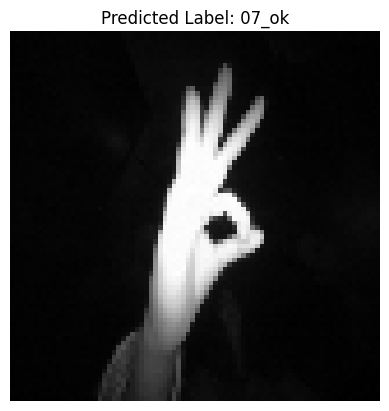

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


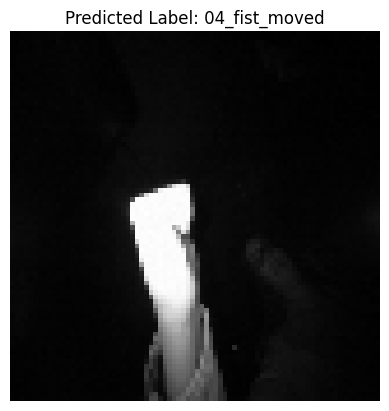

In [ ]:
# Predict on 5 random images from the validation set
for _ in range(5):
    random_idx = random.randint(0, len(x_val) - 1)
    img = x_val[random_idx].reshape(1, IMG_SIZE, IMG_SIZE, 1)  # Reshape the image for prediction

    # Predict the class of the image
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Get the label name using reverse lookup
    predicted_label = reverselookup[predicted_class]

    # Display the predicted label and the image
    plt.imshow(x_val[random_idx].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()